In [0]:
!pip install --upgrade tables
!pip install eli5

Requirement already up-to-date: tables in /usr/local/lib/python3.6/dist-packages (3.6.1)


In [0]:
import pandas as pd
import numpy as np

from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score

import eli5
from eli5.sklearn import PermutationImportance

In [0]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_two/dw_matrix_cars/"

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_two/dw_matrix_cars


In [0]:
ls

data/            day2_visualisation.ipynb  LICENSE
day1_meta.ipynb  day3_simple_model.ipynb   README.md


Wczytywanie danych

In [0]:
df = pd.read_hdf('data/car.h5')

In [0]:
df.shape

(106494, 155)

In [0]:
df.columns

Index(['breadcrumb', 'created_at', 'price_currency', 'price_details',
       'price_value', 'seller_address', 'seller_name', 'seller_type',
       'feature_czujniki-parkowania-przednie',
       'feature_poduszka-powietrzna-chroniąca-kolana',
       ...
       'param_pearl', 'param_stan', 'param_wersja', 'param_emisja-co2',
       'param_body-type', 'param_matowy', 'param_bezwypadkowy',
       'param_akryl-(niemetalizowany)', 'param_monthly-payment-value',
       'car_id'],
      dtype='object', length=155)

In [0]:
def group_and_barplot(feat_groupby, feat_agg='price_value', agg_funcs=[np.mean, np.median, np.size], feat_sort='size', top=50, subplots=True):
  return(
    df
    .groupby(feat_groupby)[feat_agg]
    .agg(agg_funcs)
    .sort_values(by=feat_sort, ascending=False)
    .head(top)

  ).plot(kind='bar', figsize=(27,5), subplots=subplots)

##Dummy model

In [0]:
feats = ['car_id']
X = df[feats].values
y = df['price_value'].values

model = DummyRegressor()
model.fit(X, y)
y_pred = model.predict(X)

mae(y, y_pred)

39465.934630440985

In [0]:
[x for x in df.columns if 'price' in x]

['price_currency', 'price_details', 'price_value']

In [0]:
df.price_currency.value_counts()

PLN    106290
EUR       204
Name: price_currency, dtype: int64

In [0]:
df.price_currency.value_counts(normalize=True)

PLN    0.998084
EUR    0.001916
Name: price_currency, dtype: float64

In [0]:
df = df[df['price_currency'] != 'EUR']

In [0]:
df.shape

(106290, 155)

In [0]:
df.sample(10)

,breadcrumb,created_at,price_currency,price_details,price_value,seller_address,seller_name,seller_type,feature_czujniki-parkowania-przednie,feature_poduszka-powietrzna-chroniąca-kolana,feature_kurtyny-powietrzne,feature_klimatyzacja-dwustrefowa,feature_światła-led,feature_czujnik-zmierzchu,feature_elektrycznie-ustawiane-lusterka,feature_asr-(kontrola-trakcji),feature_poduszka-powietrzna-kierowcy,feature_cd,feature_elektryczne-szyby-przednie,feature_poduszka-powietrzna-pasażera,feature_system-start-stop,feature_światła-do-jazdy-dziennej,feature_komputer-pokładowy,feature_elektryczne-szyby-tylne,feature_klimatyzacja-manualna,feature_tapicerka-welurowa,feature_czujnik-deszczu,feature_światła-przeciwmgielne,feature_ogrzewanie-postojowe,feature_radio-niefabryczne,feature_regulowane-zawieszenie,feature_ogranicznik-prędkości,feature_zmieniarka-cd,feature_szyberdach,feature_isofix,feature_asystent-pasa-ruchu,feature_alufelgi,feature_bluetooth,feature_nawigacja-gps,feature_asystent-parkowania,...,param_particle-filter,param_zarejestrowany-w-polsce,param_oferta-od,param_moc,param_make,param_kraj-pochodzenia,param_engine-power,param_year,param_serwisowany-w-aso,param_rodzaj-paliwa,param_możliwość-finansowania,param_registered-in-poland,param_transmission,param_miesięczna-rata,param_kod-silnika,param_version,param_opłata-początkowa,param_model-pojazdu,param_pojemność-skokowa,param_kierownica-po-prawej-(anglik),param_fuel-type,param_vat-free,param_acrylic,param_damaged,param_door-count,param_tuning,param_filtr-cząstek-stałych,param_nr-of-seats,param_kolor,param_engine-capacity,param_pearl,param_stan,param_wersja,param_emisja-co2,param_body-type,param_matowy,param_bezwypadkowy,param_akryl-(niemetalizowany),param_monthly-payment-value,car_id
28784,"[Osobowe, Renault, Grand Scenic, Renault Grand...","20:12, 5 marca 2018",PLN,"Cena Brutto, Do negocjacji",45700.0,Wojska Polskiego 170 obok st.CPN Exol (były Lo...,LIDER,Dealer,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,False,False,False,False,True,False,True,False,True,True,True,False,...,None,None,Firmy,130 KM,None,None,None,None,Tak,Diesel,Tak,None,None,None,None,None,None,Grand Scenic,1 600 cm3,None,None,None,None,None,None,None,None,None,Niebieski,None,None,Używane,IV (2013-),None,None,None,Tak,None,None,28784
35705,"[Osobowe, Mercedes-Benz, GLC, GLC 220]","12:54, 2 marca 2018",PLN,"Cena Brutto, Faktura VAT",218000.0,"STARE BIELICE 128 - 76-039 Biesiekierz, koszal...",Mercedes-Benz GRUPA MOJSIUK,Dealer,True,True,False,False,True,True,True,True,True,False,True,True,True,True,False,True,True,False,True,False,False,False,False,True,False,False,True,False,True,True,False,True,...,None,None,Firmy,170 KM,None,None,None,None,None,Diesel,None,None,None,None,GLC 220,None,None,GLC,2 143 cm3,None,None,None,None,None,None,None,Tak,None,Czarny,None,None,Nowe,None,129 g/km,None,None,Tak,None,None,35705
15591,"[Osobowe, Toyota, RAV4, Toyota RAV4 IV (2012-)]","15:38, 2 marca 2018",PLN,"Cena Brutto, Faktura VAT",129900.0,"Platynowa 2, Komorniki - 62-052 Komorniki, poz...",BOŃKOWSCY AUTO,Dealer,True,True,True,False,True,True,True,True,True,True,True,True,False,True,True,True,False,False,True,True,False,False,False,False,False,False,True,True,True,True,True,False,...,None,Tak,Firmy,155 KM,None,Polska,None,None,Tak,Hybryda,Tak,None,None,None,None,None,None,RAV4,2 494 cm3,None,None,None,None,None,None,None,None,None,Biały,None,None,Używane,IV (2012-),None,None,None,Tak,None,None,15591
67330,"[Osobowe, Škoda, Octavia, Škoda Octavia III (2...","16:00, 5 marca 2018",PLN,"Cena Brutto, Do negocjacji, Faktura VAT",59900.0,"WARSZAWSKA 84 - 05-300 Stojadła, miński, Mazow...",CARSED Spółka z Ograniczoną Odpowiedzialnościa...,Dealer,False,False,False,False,False,False,True,True,True,False,True,True,False,True,True,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,...,None,Tak,Firmy,150 KM,None,Polska,None,None,Tak,Be

In [0]:
for feat in df.columns:
  print(feat)

breadcrumb
created_at
price_currency
price_details
price_value
seller_address
seller_name
seller_type
feature_czujniki-parkowania-przednie
feature_poduszka-powietrzna-chroniąca-kolana
feature_kurtyny-powietrzne
feature_klimatyzacja-dwustrefowa
feature_światła-led
feature_czujnik-zmierzchu
feature_elektrycznie-ustawiane-lusterka
feature_asr-(kontrola-trakcji)
feature_poduszka-powietrzna-kierowcy
feature_cd
feature_elektryczne-szyby-przednie
feature_poduszka-powietrzna-pasażera
feature_system-start-stop
feature_światła-do-jazdy-dziennej
feature_komputer-pokładowy
feature_elektryczne-szyby-tylne
feature_klimatyzacja-manualna
feature_tapicerka-welurowa
feature_czujnik-deszczu
feature_światła-przeciwmgielne
feature_ogrzewanie-postojowe
feature_radio-niefabryczne
feature_regulowane-zawieszenie
feature_ogranicznik-prędkości
feature_zmieniarka-cd
feature_szyberdach
feature_isofix
feature_asystent-pasa-ruchu
feature_alufelgi
feature_bluetooth
feature_nawigacja-gps
feature_asystent-parkowania
fe

In [0]:
SUFFIX_CAT = '__cat'

for feat in df.columns:
  if isinstance(df[feat][0], list):
    continue

  factorize_values = df[feat].factorize()[0]
  if SUFFIX_CAT in feat:
    df[feat] = factorize_values
  else:
    df[feat + SUFFIX_CAT] = factorize_values

In [0]:
cat_feats = [x for x in df.columns if SUFFIX_CAT in x]
cat_feats = [x for x in cat_feats if 'price' not in x]

print(len(cat_feats))
cat_feats

151


['created_at__cat',
 'seller_address__cat',
 'seller_name__cat',
 'seller_type__cat',
 'feature_czujniki-parkowania-przednie__cat',
 'feature_poduszka-powietrzna-chroniąca-kolana__cat',
 'feature_kurtyny-powietrzne__cat',
 'feature_klimatyzacja-dwustrefowa__cat',
 'feature_światła-led__cat',
 'feature_czujnik-zmierzchu__cat',
 'feature_elektrycznie-ustawiane-lusterka__cat',
 'feature_asr-(kontrola-trakcji)__cat',
 'feature_poduszka-powietrzna-kierowcy__cat',
 'feature_cd__cat',
 'feature_elektryczne-szyby-przednie__cat',
 'feature_poduszka-powietrzna-pasażera__cat',
 'feature_system-start-stop__cat',
 'feature_światła-do-jazdy-dziennej__cat',
 'feature_komputer-pokładowy__cat',
 'feature_elektryczne-szyby-tylne__cat',
 'feature_klimatyzacja-manualna__cat',
 'feature_tapicerka-welurowa__cat',
 'feature_czujnik-deszczu__cat',
 'feature_światła-przeciwmgielne__cat',
 'feature_ogrzewanie-postojowe__cat',
 'feature_radio-niefabryczne__cat',
 'feature_regulowane-zawieszenie__cat',
 'feature_

In [0]:
X = df[cat_feats].values
y = df['price_value'].values

model = DecisionTreeRegressor(max_depth=10)
scores = cross_val_score(model, X, y, cv=3, scoring='neg_mean_absolute_error')
np.mean(scores)

-15605.982935242027

In [0]:
m = DecisionTreeRegressor(max_depth=5)
m.fit(X, y)

imp = PermutationImportance(m, random_state=2020).fit(X, y)
eli5.show_weights(imp, feature_names=cat_feats)

Weight,Feature
0.2519 ± 0.0035,param_napęd__cat
0.1995 ± 0.0057,param_faktura-vat__cat
0.1935 ± 0.0059,param_stan__cat
0.1428 ± 0.0066,param_rok-produkcji__cat
0.0634 ± 0.0032,param_moc__cat
0.0423 ± 0.0022,param_skrzynia-biegów__cat
0.0418 ± 0.0017,feature_kamera-cofania__cat
0.0285 ± 0.0046,param_marka-pojazdu__cat
0.0197 ± 0.0044,param_pojemność-skokowa__cat
0.0164 ± 0.0004,feature_bluetooth__cat


Tworzymy model w oparciu o najlepsze cech (wg Eli5)

In [0]:
feat_best = ['param_faktura-vat__cat', 'param_napęd__cat', 'param_stan__cat', 'param_rok-produkcji__cat', 'param_skrzynia-biegów__cat', 'param_moc__cat', 'feature_kamera-cofania__cat', 'param_pojemność-skokowa__cat', 'feature_bluetooth__cat', 'feature_światła-led__cat', 'feature_łopatki-zmiany-biegów__cat', 'param_typ__cat', 'param_marka-pojazdu__cat', 'feature_czujniki-parkowania-przednie__cat']

In [0]:
X = df[feat_best].values
y = df['price_value'].values

model = DecisionTreeRegressor(max_depth=15, splitter='best')
scores = cross_val_score(model, X, y, cv=3, scoring='neg_mean_absolute_error')
np.mean(scores)

-13354.898564505449

In [0]:
df['param_pojemność-skokowa'].sample(20)

44977     1 956 cm3
52906     5 000 cm3
69859     1 600 cm3
8537           None
53567     4 200 cm3
93263     1 600 cm3
70444     1 600 cm3
157814    1 400 cm3
92363     1 598 cm3
74449     1 000 cm3
150586    1 600 cm3
155338    1 600 cm3
63391     1 900 cm3
145671         None
160060    3 000 cm3
82297     1 689 cm3
50724     1 600 cm3
89493     2 000 cm3
75102     1 896 cm3
157260    2 143 cm3
Name: param_pojemność-skokowa, dtype: object

In [0]:
df['param_pojemność-skokowa'].describe()

count        101205
unique         1209
top       2 000 cm3
freq          12301
Name: param_pojemność-skokowa, dtype: object

In [0]:
def pojemnosc_skokowa_obj2int(cm3):
  if not isinstance(cm3, str): #zabezpiecznie w przypadku braku danych - jak się okazało potrzebne
    return -1

  poj_s = cm3.replace(" cm3", "") #pozbywamy się centymetrów3
  poj_s = int(poj_s.replace(' ', ''))  #i spacji 'tysięcznych' i  konwertujemy na liczbę
  return poj_s

df['param_pojemność-skokowa_int'] = df['param_pojemność-skokowa'].map(pojemnosc_skokowa_obj2int)

In [0]:
df['param_pojemność-skokowa_int'].describe()

count    1.062900e+05
mean     2.195736e+03
std      1.632293e+04
min     -1.000000e+00
25%      1.400000e+03
50%      1.800000e+03
75%      2.000000e+03
max      3.000218e+06
Name: param_pojemność-skokowa_int, dtype: float64

In [0]:
df['param_pojemność-skokowa_int'].sample(25)

115934    3000
131242    2000
125821    1968
157841    1600
22808     3000
82398     1798
108988    1956
130545    5000
13419     1995
63057     1998
85463     1600
109802    2979
131679    1390
3920      2000
6752      1600
9791      1900
115045    1850
128271    1968
39494     2000
159339      -1
91770     1400
120960    2000
122952    1242
104539    1799
159925    1600
Name: param_pojemność-skokowa_int, dtype: int64

##ponownie tworzymy model ale podmieniamy *param_pojemność-skokowa__cat* na *param_pojemność-skokowa_int*

In [0]:
feat_best2 = ['param_faktura-vat__cat', 'param_napęd__cat', 'param_stan__cat', 'param_rok-produkcji__cat', 'param_skrzynia-biegów__cat', 'param_moc__cat', 'feature_kamera-cofania__cat', 'param_pojemność-skokowa_int', 'feature_bluetooth__cat', 'feature_światła-led__cat', 'feature_łopatki-zmiany-biegów__cat', 'param_typ__cat', 'param_marka-pojazdu__cat', 'feature_czujniki-parkowania-przednie__cat']

In [0]:
X = df[feat_best2].values
y = df['price_value'].values

model = DecisionTreeRegressor(max_depth=15, splitter='best')
scores = cross_val_score(model, X, y, cv=3, scoring='neg_mean_absolute_error')
np.mean(scores)

-12453.831179435923

z **-13330.48** na **-12456.85** - lepiej!

##wykres z liczbową wartością pojemności skokowej silnika:

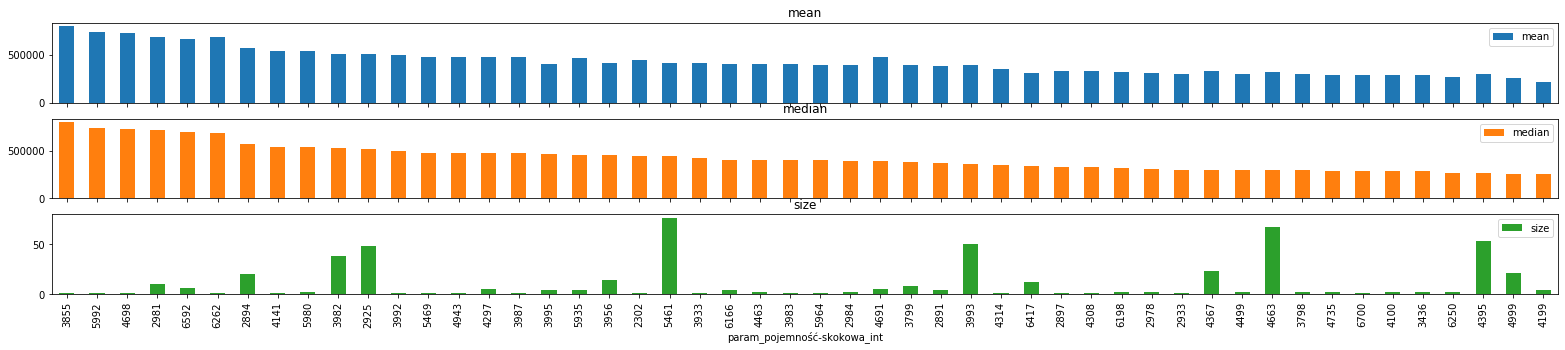

In [0]:
group_and_barplot('param_pojemność-skokowa_int', feat_sort='median');